In [66]:
# Srikanth Schelbert Homework2

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import math

In [67]:
# All homework 1 functions
centerpoint = (6, 12)


def f(x,s):      
    # s = source (center of barbell)     
    # x = point      
    dcol = abs(x[0] - s[0])     
    drow = abs(x[1] - s[1])      
    # print(f"d col = {dcol}, d row = {drow}")      
    if (drow == 0) & (dcol == 0):         
        return 1     
    elif (drow == 1) & (dcol <= 1):         
        return 0.5     
    elif (drow == 2) & (dcol <= 2):         
        return (1/3)     
    elif (drow == 3) & (dcol <= 3):         
        return 0.25     
    else:         
        return 0 

# Generate grid points
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
X, Y = np.meshgrid(x, y)


# @functools.lru_cache(maxsize=None)
def compute_z(X, Y, centerpoint):
    """Compute function values Z"""
    Z = np.zeros_like(X)  # Initialize array for function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f([X[i, j], Y[i, j]], centerpoint)
    return Z


def prob_z_given_x(x_i, s_i, z_i):
    """Computes p(z|x)"""
    if z_i == 1:
        return f(x_i, s_i)
    else:
        return 1 - f(x_i, s_i)


# @functools.lru_cache(maxsize=None)
def compute_L(X, Y, samples, results_vec):
    """Compute function values Z"""
    L = np.ones_like(X)  # Initialize array for function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(len(results_vec)):
                L[i, j] *= prob_z_given_x(samples[k], [X[i, j], Y[i, j]], results_vec[k])
    return L


def generate_results(sample):
    """Generates 100 results from the same sample"""
    results = []
    for _ in range(100):
        x, y = sample[0], sample[1]
        if np.random.rand() < f([x, y], centerpoint):
            results.append(1)
        else:
            results.append(0)
    return results


def generate_one_result(sample):
    """Generates one results from a sample"""
    x, y = sample[0], sample[1]
    if np.random.rand() < f([x, y], centerpoint):
        return 1
    else:
        return 0


def compute_prob_sum(X, Y, sample, result, belief):
    """Compute probability sum"""
    p_sum = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            p_sum += prob_z_given_x(sample, [X[i, j], Y[i, j]], result) * belief[i, j]
    return p_sum


# Belief update eqn
def prob_s_given_z(x_i, s_i, z_i, b_bar_i, p_sum):
    """Computes p(s|z)"""
    return (prob_z_given_x(x_i, s_i, z_i) * b_bar_i)/p_sum


def update_belief(x_i, z_i, b_bar, p_sum):
    """Update total belief matrix"""
    Belief = np.ones_like(b_bar)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Belief[i, j] = prob_s_given_z(x_i, [X[i, j], Y[i, j]], z_i, b_bar[i, j], p_sum)
    return Belief

def random_walk(location):
    x_rand = np.random.rand()
    y_rand = np.random.rand()

    if 0 <= x_rand < 0.33 and location[0] > 0:
        location[0] = location[0] - 1
    elif 1 >= x_rand > 0.67 and location[0] < 24:
        location[0] = location[0] + 1
    
    if 0 <= y_rand < 0.33 and location[1] > 0:
        location[1] = location[1] - 1
    elif 1 >= y_rand > 0.67 and location[1] < 24:
        location[1] = location[1] + 1

    return location



(25, 25)


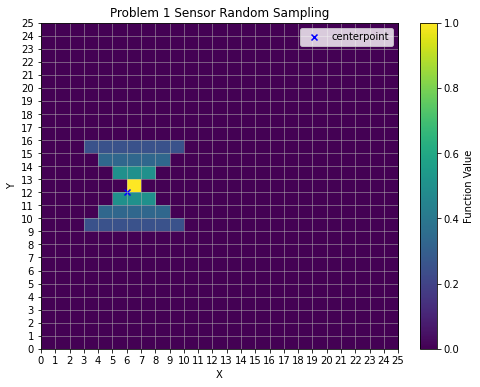

In [68]:
# Generate grid points
x = np.linspace(0, 24, 25)
y = np.linspace(0, 24, 25)
X, Y = np.meshgrid(x, y)

# Create the plot
centerpoint = (6, 12)
plt.figure(figsize=(8, 6))
# Plot sampled locations
plt.scatter(centerpoint[0], centerpoint[1], marker='x',
            color='blue', label='centerpoint')

Z_mat = compute_z(X, Y, centerpoint)
print(Z_mat.shape)

# Add legend
plt.legend(loc='upper right')
plt.imshow(Z_mat, extent=[0, 25, 0, 25], cmap='viridis',
           origin='lower', aspect='auto')
plt.colorbar(label='Function Value')
plt.title('Problem 1 Sensor Random Sampling')
plt.grid(which='both', linestyle='-', linewidth=0.5)
plt.xticks(np.arange(0, 26, 1))  # Set ticks every 1 unit
plt.yticks(np.arange(0, 26, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

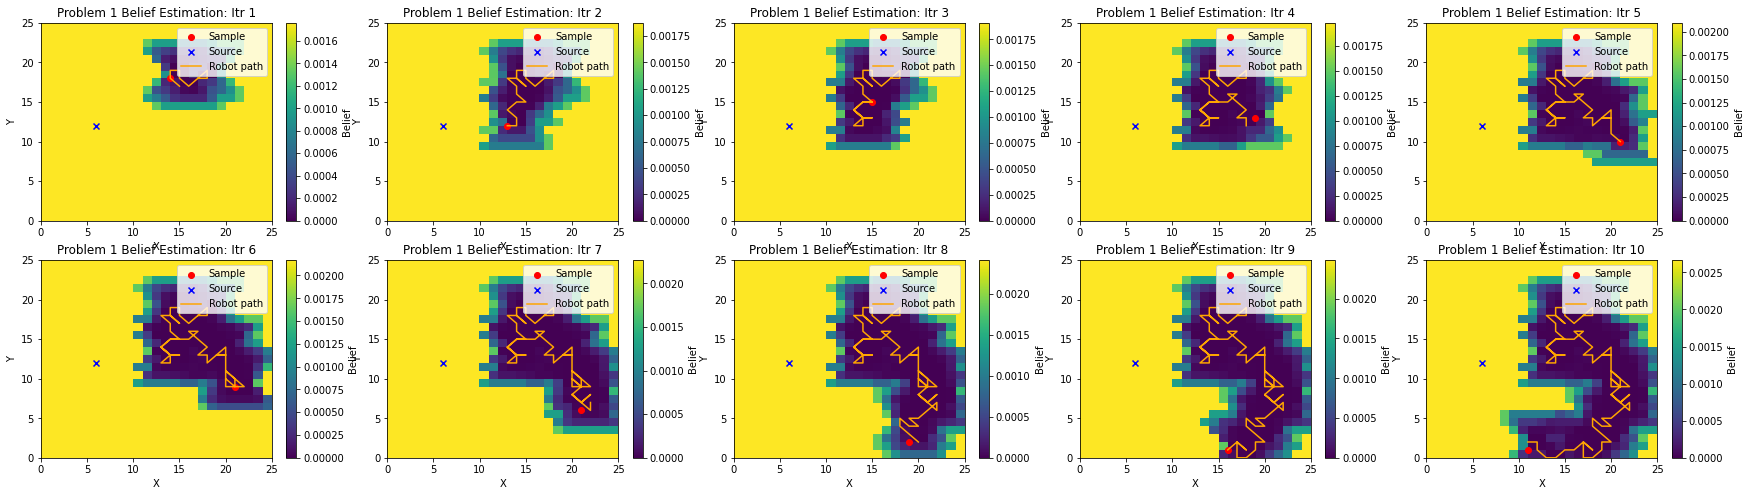

In [79]:
initial_prior = 1/(X.shape[1] * X.shape[0])
B = np.ones_like(X) * initial_prior  # Initialize array for prior belief

# Define your plotting function
def plot_iteration(sample, belief, result, x_values, y_values, subplot_index):
    plt.subplot(2, 5, subplot_index)

    # Define custom colormap from black to green
    colors = [(0, 0, 0), (0, 0.5, 0)]  # black to dark green
    cmap_name = 'black_to_green'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Add white sensor gradient
    # plt.legend(loc='upper right')
    # plt.imshow(Z_mat, extent=[0, 25, 0, 25], cmap='gray',
    #         origin='lower', aspect='auto', alpha=0.7)
    # plt.colorbar(label='True Bernoulli Dist')

    if result == 1:
        plt.scatter(sample[0], sample[1], color='green', label='Sample')
    else:
        plt.scatter(sample[0], sample[1], color='red', label='Sample')
    plt.scatter(centerpoint[0], centerpoint[1], marker='x',
                color='blue', label='Source')

    plt.plot(x_vals, y_vals, color='orange', label='Robot path')
    # Add legend
    plt.legend(loc='upper right')
    plt.imshow(belief, extent=[0, 25, 0, 25], cmap='viridis',
               origin='lower', aspect='auto', alpha=1.0)
    plt.colorbar(label='Belief')
    plt.title(f'Problem 1 Belief Estimation: Itr {subplot_index}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.figure(figsize=(30, 8))  # Adjust figure size as needed

curr_sample = [17, 18]
x_vals = []
y_vals = []
# Iteratively generate and plot results for different samples
for i in range(10):  # Change the range according to the desired number of iterations
    for j in range(10):
        x_vals.append(curr_sample[0])
        y_vals.append(curr_sample[1])
        curr_sample = random_walk(curr_sample)
        curr_result = generate_one_result(curr_sample)
        prob_sum = compute_prob_sum(X, Y, curr_sample, curr_result, B)
        B = update_belief(curr_sample, curr_result, B, prob_sum)
    plot_iteration(curr_sample, B, curr_result, x_vals, y_vals, subplot_index=i+1)
plt.show()